In [1]:
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [34]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
cdata = pd.read_csv("usedcars.csv")
cdata

,year,model,price,mileage,color,transmission
0,2011,SEL,21992.0,7413.0,Yellow,AUTO
1,2011,SEL,20995.0,10926.0,Gray,AUTO
2,2011,SEL,19995.0,7351.0,Silver,AUTO
3,2011,SEL,17809.0,11613.0,Gray,AUTO
4,2012,SE,17500.0,8367.0,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200.0,95000.0,Silver,AUTO
146,2002,SE,5995.0,87003.0,Red,AUTO
147,2000,SE,5980.0,NaN,Red,AUTO
148,2001,SE,4899.0,151479.0,Yellow,AUTO


In [35]:
cdata.describe()

,year,price,mileage
count,150.000000,142.000000,143.000000
mean,2008.726667,12918.246479,43727.027972
std,2.200966,3169.089050,27084.279522
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,26801.500000
50%,2009.000000,13631.000000,36306.000000
75%,2010.000000,14904.500000,53817.500000
max,2012.000000,21992.000000,151479.000000


In [36]:
cdata['year'].count()

150

In [37]:
cdata['price'].count()

142

In [38]:
cdata['mileage'].count()

143

In [39]:
cdata['color'].count()

141

In [40]:
cdata['transmission'].count()

142

In [41]:
cdata['transmission'].value_counts()

AUTO      124
MANUAL     18
Name: transmission, dtype: int64

In [42]:
cdata ['transmission'].fillna('AUTO', inplace=True)

In [43]:
cdata['transmission'].value_counts()

AUTO      132
MANUAL     18
Name: transmission, dtype: int64

In [44]:
cdata['color'].value_counts()

Black     33
Silver    32
Red       22
Blue      16
Gray      15
White     14
Green      5
Yellow     3
Gold       1
Name: color, dtype: int64

In [45]:
cdata ['color'].fillna('Black', inplace=True)

In [46]:
cdata['color'].value_counts()

Black     42
Silver    32
Red       22
Blue      16
Gray      15
White     14
Green      5
Yellow     3
Gold       1
Name: color, dtype: int64

In [47]:
cdata.drop(columns=["color"])

,year,model,price,mileage,transmission
0,2011,SEL,21992.0,7413.0,AUTO
1,2011,SEL,20995.0,10926.0,AUTO
2,2011,SEL,19995.0,7351.0,AUTO
3,2011,SEL,17809.0,11613.0,AUTO
4,2012,SE,17500.0,8367.0,AUTO
...,...,...,...,...,...
145,2006,SES,6200.0,95000.0,AUTO
146,2002,SE,5995.0,87003.0,AUTO
147,2000,SE,5980.0,NaN,AUTO
148,2001,SE,4899.0,151479.0,AUTO


In [48]:
cdata['model'].count()

150

In [49]:
cdata.shape

(150, 6)

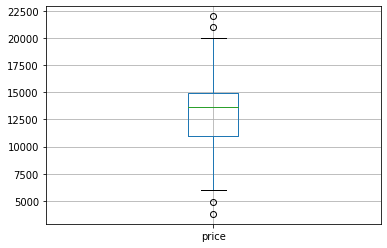

In [75]:
%matplotlib inline
cdata.boxplot(column='price')

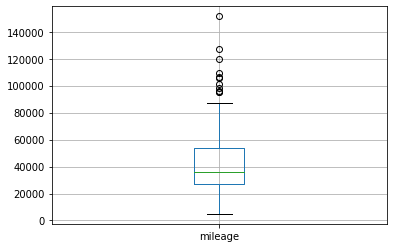

In [76]:
cdata.boxplot(column='mileage')

In [50]:
cdata.apply(lambda x: sum(x.isnull()),axis=0)

year            0
model           0
price           8
mileage         7
color           0
transmission    0
dtype: int64

In [51]:
features = cdata.iloc[:,:-1].values

In [52]:
features

array([[2011, 'SEL', 21992.0, 7413.0, 'Yellow'],
       [2011, 'SEL', 20995.0, 10926.0, 'Gray'],
       [2011, 'SEL', 19995.0, 7351.0, 'Silver'],
       [2011, 'SEL', 17809.0, 11613.0, 'Gray'],
       [2012, 'SE', 17500.0, 8367.0, 'White'],
       [2010, 'SEL', 17495.0, 25125.0, 'Silver'],
       [2011, 'SEL', 17000.0, nan, 'Blue'],
       [2010, 'SEL', 16995.0, 21026.0, 'Silver'],
       [2011, 'SES', nan, 32655.0, 'Silver'],
       [2010, 'SES', 16995.0, 36116.0, 'Silver'],
       [2010, 'SES', 16995.0, 40539.0, 'Black'],
       [2011, 'SES', 16992.0, 9199.0, 'Silver'],
       [2011, 'SEL', 16950.0, 9388.0, 'Green'],
       [2010, 'SES', 16950.0, 32058.0, 'Red'],
       [2011, 'SE', 16000.0, 15367.0, 'White'],
       [2011, 'SES', 15999.0, 16368.0, 'Blue'],
       [2010, 'SEL', 15999.0, 19926.0, 'Silver'],
       [2010, 'SES', 15995.0, nan, 'Silver'],
       [2011, 'SEL', 15992.0, 11662.0, 'Blue'],
       [2011, 'SEL', 15992.0, 32069.0, 'Silver'],
       [2010, 'SES', 15988.0, 16035.

In [53]:
labels = cdata.iloc[:,-1].values
labels

array(['AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'MANUAL', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'MANUAL',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO',
       'MANUAL', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'MANUAL', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'MANUAL', 'AUTO', 'MANUAL',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'MANUAL', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO',
       'AUTO', 'AUTO', 'AUTO', 'MANUAL', 'MANUAL', 'AUTO', 'AUTO',
       'MANUAL', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'AUTO', 'M

In [54]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)

#2 step transformation
#Fit and transform
imputer.fit(features[:,[2,3]])
features[:,[2,3]] = imputer.fit_transform(features[:,[2,3]])

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [55]:
features

array([[2011, 'SEL', 21992.0, 7413.0, 'Yellow'],
       [2011, 'SEL', 20995.0, 10926.0, 'Gray'],
       [2011, 'SEL', 19995.0, 7351.0, 'Silver'],
       [2011, 'SEL', 17809.0, 11613.0, 'Gray'],
       [2012, 'SE', 17500.0, 8367.0, 'White'],
       [2010, 'SEL', 17495.0, 25125.0, 'Silver'],
       [2011, 'SEL', 17000.0, 43727.02797202797, 'Blue'],
       [2010, 'SEL', 16995.0, 21026.0, 'Silver'],
       [2011, 'SES', 12918.24647887324, 32655.0, 'Silver'],
       [2010, 'SES', 16995.0, 36116.0, 'Silver'],
       [2010, 'SES', 16995.0, 40539.0, 'Black'],
       [2011, 'SES', 16992.0, 9199.0, 'Silver'],
       [2011, 'SEL', 16950.0, 9388.0, 'Green'],
       [2010, 'SES', 16950.0, 32058.0, 'Red'],
       [2011, 'SE', 16000.0, 15367.0, 'White'],
       [2011, 'SES', 15999.0, 16368.0, 'Blue'],
       [2010, 'SEL', 15999.0, 19926.0, 'Silver'],
       [2010, 'SES', 15995.0, 43727.02797202797, 'Silver'],
       [2011, 'SEL', 15992.0, 11662.0, 'Blue'],
       [2011, 'SEL', 15992.0, 32069.0, 'Silv

In [56]:
df1 = pd.DataFrame(features)

In [57]:
df1

,0,1,2,3,4
0,2011,SEL,21992,7413,Yellow
1,2011,SEL,20995,10926,Gray
2,2011,SEL,19995,7351,Silver
3,2011,SEL,17809,11613,Gray
4,2012,SE,17500,8367,White
...,...,...,...,...,...
145,2006,SES,6200,95000,Silver
146,2002,SE,5995,87003,Red
147,2000,SE,5980,43727,Red
148,2001,SE,4899,151479,Yellow


In [58]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [59]:
df1.describe()

,0,1,2,3,4
count,150,150,150.000000,150.000000,150
unique,13,3,114.000000,144.000000,9
top,2010,SE,12918.246479,43727.027972,Black
freq,49,78,8.000000,7.000000,42


In [60]:
df1[4]

0      Yellow
1        Gray
2      Silver
3        Gray
4       White
        ...  
145    Silver
146       Red
147       Red
148    Yellow
149       Red
Name: 4, Length: 150, dtype: object

In [61]:
x=df1.iloc[:,0:5]
x

,0,1,2,3,4
0,2011,SEL,21992,7413,Yellow
1,2011,SEL,20995,10926,Gray
2,2011,SEL,19995,7351,Silver
3,2011,SEL,17809,11613,Gray
4,2012,SE,17500,8367,White
...,...,...,...,...,...
145,2006,SES,6200,95000,Silver
146,2002,SE,5995,87003,Red
147,2000,SE,5980,43727,Red
148,2001,SE,4899,151479,Yellow


In [62]:
df1[1].value_counts()

SE     78
SES    49
SEL    23
Name: 1, dtype: int64

In [63]:
df1[1].replace(['SE','SES', 'SEL'],[11,12,13],inplace=True)

In [64]:
df1[4].value_counts()

Black     42
Silver    32
Red       22
Blue      16
Gray      15
White     14
Green      5
Yellow     3
Gold       1
Name: 4, dtype: int64

In [65]:
df1[4].replace(['Black','Silver','Red','Blue','Gray','White','Green','Yellow','Gold'],[2,3,4,5,6,7,8,9,10],inplace=True)

In [66]:
cdata['transmission'].replace(['AUTO','MANUAL'],[0,1],inplace=True)

In [67]:
x=df1.iloc[:,0:5]
x

,0,1,2,3,4
0,2011,13,21992,7413,9
1,2011,13,20995,10926,6
2,2011,13,19995,7351,3
3,2011,13,17809,11613,6
4,2012,11,17500,8367,7
...,...,...,...,...,...
145,2006,12,6200,95000,3
146,2002,11,5995,87003,4
147,2000,11,5980,43727,4
148,2001,11,4899,151479,9


In [68]:
y=cdata.iloc[:,5]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: transmission, Length: 150, dtype: int64

In [69]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.91666667, 1.        , 1.        , 0.01736556, 0.875     ],
       [0.91666667, 1.        , 0.94519569, 0.04132677, 0.5       ],
       [0.91666667, 1.        , 0.89022647, 0.01694268, 0.125     ],
       [0.91666667, 1.        , 0.77006376, 0.0460126 , 0.5       ],
       [1.        , 0.        , 0.75307828, 0.02387253, 0.625     ],
       [0.83333333, 1.        , 0.75280343, 0.13817423, 0.125     ],
       [0.91666667, 1.        , 0.72559367, 0.26505353, 0.375     ],
       [0.83333333, 1.        , 0.72531882, 0.11021608, 0.125     ],
       [0.91666667, 0.5       , 0.50122287, 0.18953428, 0.125     ],
       [0.83333333, 0.5       , 0.72531882, 0.21314081, 0.125     ],
       [0.83333333, 0.5       , 0.72531882, 0.24330887, 0.        ],
       [0.91666667, 0.5       , 0.72515391, 0.02954738, 0.125     ],
       [0.91666667, 1.        , 0.72284521, 0.03083649, 0.75      ],
       [0.83333333, 0.5       , 0.72284521, 0.18546231, 0.25      ],
       [0.91666667, 0.        , 0.

In [152]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [153]:
x_train

,0,1,2,3,4
43,2009,12,14549,34046,3
32,2011,11,14992,4867,2
31,2009,11,14995,34419,2
39,2010,11,12918.2,11165,7
118,2007,12,10815,77231,4
...,...,...,...,...,...
122,2007,12,9999,74427,3
72,2010,13,13687,35574,6
121,2007,12,10000,63926,4
133,2008,11,8494,43727,3


In [154]:
y_train = y_train.astype('int')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: transmission, Length: 150, dtype: int64

In [155]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [156]:
#Predicting the Test Set Result
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [157]:
y_test

110    1
141    0
129    0
144    0
40     0
134    1
68     0
59     0
126    0
116    0
143    0
111    0
42     0
52     0
117    1
125    0
85     0
7      0
119    1
30     0
29     0
9      0
101    0
136    1
3      0
60     0
28     0
33     0
11     0
139    0
69     0
62     0
53     0
106    0
97     0
135    1
137    0
0      0
24     0
36     0
128    0
66     0
142    0
112    0
61     1
Name: transmission, dtype: int64

In [158]:
#Confusion Matrix to accept the model or Reject the model.
#Build Confusion Matrix on test and Train
from sklearn.metrics import confusion_matrix
clf_cm_test = confusion_matrix(y_test,y_pred)
clf_cm_test

array([[38,  0],
       [ 7,  0]], dtype=int64)

In [159]:
#Obtain Accuracy
accuracy = clf.score(x_test, y_test)
accuracy

0.8444444444444444

In [160]:
probas = clf.predict_proba(x_test)

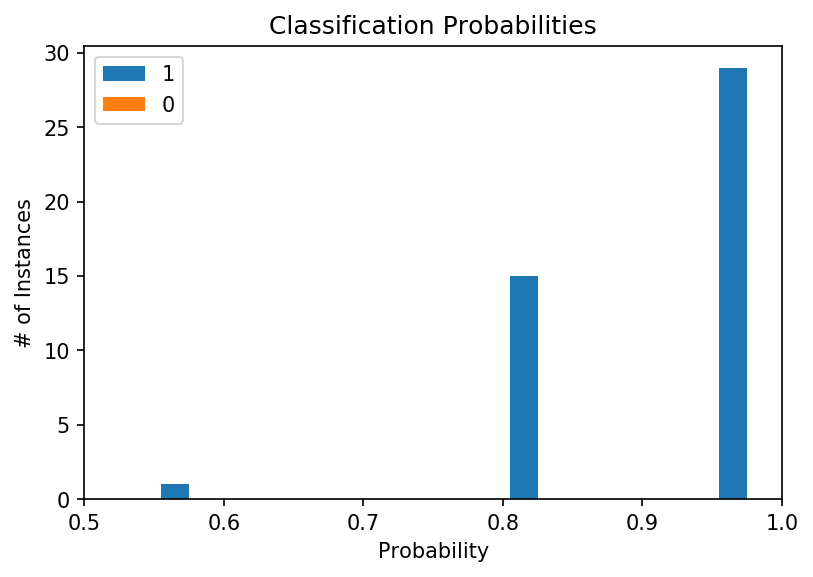

In [161]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [162]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

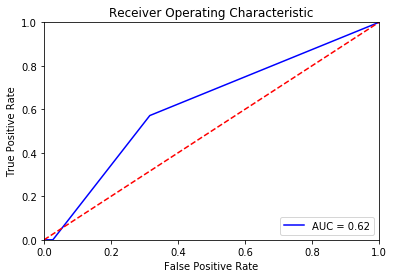

In [163]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [164]:
#Test new data
example_measures=np.array([2012,12,22999,1111,3])
example_measures = example_measures.reshape(1,-1)
example_measures

array([[ 2012,    12, 22999,  1111,     3]])

In [165]:
example_measures1=np.array([2015,15,22333,2222,5])
example_measures1 = example_measures.reshape(1,-1)
example_measures1

array([[ 2012,    12, 22999,  1111,     3]])

In [166]:
prediction = clf.predict(example_measures)
prediction1 = clf.predict(example_measures1)

In [167]:
print(prediction)
print(prediction1)

[0]
[0]


In [168]:
#Perform Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression

cls =LogisticRegression(random_state =0)

lr_cls=cls.fit(x_train, y_train)

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [169]:
#Predicting on test and train data
lr_y_test =lr_cls.predict(x_test)
lr_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [170]:
lr_y_train = lr_cls.predict(x_train)
lr_y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [171]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
lr_cm_test = confusion_matrix(y_test, lr_y_test)
lr_cm_test

array([[38,  0],
       [ 7,  0]], dtype=int64)

In [172]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
lr_accu_test= accuracy_score(y_test,lr_y_test)
lr_accu_test

0.8444444444444444

In [173]:
lr_accu_train= accuracy_score(y_train,lr_y_train)  #train 98--rs=50  
lr_accu_train

0.8952380952380953

In [175]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
#recall_score
lr_precision_test =precision_score(y_test, lr_y_test, average='weighted')  
print(lr_precision_test)
lr_precision_train =precision_score(y_train, lr_y_train, average='weighted')
print(lr_precision_train)

0.7130864197530864
0.8014512471655328


In [176]:
from sklearn.naive_bayes import GaussianNB
nb_classfier  = GaussianNB()
nb_classfier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [177]:
nb_y_test =  nb_classfier.predict(x_test)
nb_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [178]:
nb_y_train = nb_classfier.predict(x_train)
nb_y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [179]:
from sklearn.metrics import confusion_matrix
nb_cm_test = confusion_matrix(y_test, nb_y_test)
nb_cm_test

array([[38,  0],
       [ 7,  0]], dtype=int64)

In [180]:
from sklearn.metrics import accuracy_score
nb_acc_test =  accuracy_score(y_test, nb_y_test)
nb_acc_test

0.8444444444444444

In [181]:
nb_acc_train = accuracy_score(y_train, nb_y_train)
nb_acc_train

0.8952380952380953

In [182]:
from sklearn.metrics import precision_score
nb_precision_test =precision_score(y_test, nb_y_test, average='weighted')  
print(nb_precision_test)
nb_precision_train =precision_score(y_train, nb_y_train, average='weighted')
print(nb_precision_train)

0.7130864197530864
0.8014512471655328


C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [183]:
#Support Vector Classification
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(x_train,y_train)  #model building 

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [184]:
#Predicting on Test and Train data
svc_y_test = sc_classifier.predict(x_test)
print(svc_y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [185]:
svc_y_train=sc_classifier.predict(x_train)  #train
print(svc_y_train)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [186]:
#Build confusion matrix on test and train
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test,svc_y_test)   
svc_cm_test

array([[38,  0],
       [ 7,  0]], dtype=int64)

In [187]:
svc_cm_train =confusion_matrix(y_train, svc_y_train)
svc_cm_train

array([[94,  0],
       [ 0, 11]], dtype=int64)

In [188]:
#Accuracy classsification score
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test, svc_y_test)  #for test  
svc_acc_test

0.8444444444444444

In [189]:
svc_acc_train= accuracy_score(y_train, svc_y_train)  #for train  
svc_acc_train

1.0

In [190]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
sv_precision_test= precision_score(y_test, svc_y_test, average='weighted')  
print(sv_precision_test)
sv_precision_train=precision_score(y_train, svc_y_train, average='weighted')
print(sv_precision_train)

0.7130864197530864
1.0


C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [191]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier(max_depth = 3)
dtc_clf.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [192]:
#Predicting on test and train data
dtc_y_test =dtc_clf.predict(x_test)
dtc_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [193]:
dtc_y_train = dtc_clf.predict(x_train)
dtc_y_train


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, dtc_y_test)
dtc_cm_test

array([[38,  0],
       [ 7,  0]], dtype=int64)

In [195]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
dtc_accu_test= accuracy_score(y_test,dtc_y_test)
dtc_accu_test

0.8444444444444444

In [196]:
dtc_accu_train= accuracy_score(y_train,dtc_y_train)    
dtc_accu_train

0.9047619047619048

In [197]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

dtc_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(dtc_precision_test)
dtc_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(dtc_precision_train)

0.7130864197530864
0.913919413919414


C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [198]:
#Recall score on Test and Train
from sklearn.metrics import recall_score
dtc_recall_test=recall_score(y_test,dtc_y_test, average='weighted' )
print(dtc_recall_test)
dtc_recall_train=recall_score(y_train,dtc_y_train, average='weighted' )
print(dtc_recall_train)

0.8444444444444444
0.9047619047619048


In [199]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rf_classi = rmf.fit(x_train, y_train)

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [200]:
#Predicting on test and train data
rf_y_test = rf_classi.predict(x_test)
rf_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [201]:
rf_y_train = rf_classi.predict(x_train)
rf_y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [202]:
#Build Confusion Matrix on Test and Train
from sklearn.metrics import confusion_matrix
rf_cm_test = confusion_matrix(y_test, rf_y_test)
rf_cm_test

array([[38,  0],
       [ 7,  0]], dtype=int64)

In [203]:
rf_cm_train = confusion_matrix(y_train, rf_y_train)
rf_cm_train

array([[94,  0],
       [10,  1]], dtype=int64)

In [204]:
#Accuracy Score on Test and Train
from sklearn.metrics import accuracy_score
rf_accu_test= accuracy_score(y_test,rf_y_test)  #test
rf_accu_test

0.8444444444444444

In [205]:
rf_accu_train= accuracy_score(y_train,rf_y_train)  
rf_accu_train

0.9047619047619048

In [206]:
#Precision Score on Test and Train
from sklearn.metrics import precision_score
rf_precision_test =precision_score(y_test, rf_y_test, average='weighted')  
print(rf_precision_test)  #test data
rf_precision_train =precision_score(y_train, rf_y_train, average='weighted')
print(rf_precision_train) #train data

0.7130864197530864
0.913919413919414


C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [207]:
from sklearn.metrics import recall_score
rf_recall_test=recall_score(y_test,rf_y_test, average='weighted' )
print(rf_recall_test)
rf_recall_train=recall_score(y_train,rf_y_train, average='weighted' )
print(rf_recall_train)

0.8444444444444444
0.9047619047619048


In [208]:
#Perform AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

In [209]:
print(results)

[0.90909091 0.90909091 0.90909091 0.63636364 1.         0.6
 0.8        1.         0.8        0.7       ]


In [210]:
print(results.mean())

0.8263636363636364
